In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import pysplit
import geopandas as gpd

In [2]:
from __future__ import division


#### mute print otherwise too much print will cause the program to crash

In [10]:
import sys

sys.stdout = open('output.txt', 'w')


In [11]:
print("Hello, World!")

#### Create a dataframe including the position and time of the backward trajectory you want to run (the following takes Southern University of Science and Technology as an example

In [12]:
import pandas as pd

data = {
    'year': [2011] * 10,
    'month': [6] * 10,
    'day': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    'lat': [22.4] * 10,
    'lon': [114] * 10
}

df = pd.DataFrame(data)

In [13]:
df

,year,month,day,lat,lon
0,2011,6,10,22.4,114
1,2011,6,11,22.4,114
2,2011,6,12,22.4,114
3,2011,6,13,22.4,114
4,2011,6,14,22.4,114
5,2011,6,15,22.4,114
6,2011,6,16,22.4,114
7,2011,6,17,22.4,114
8,2011,6,18,22.4,114
9,2011,6,19,22.4,114


In [14]:
year = df['year']
month = df['month']
day = df['day']
lat = df['lat']
lon = df['lon']

In [15]:
working_dir = r'/Users/gong/hysplit/working'
output_dir = r'/Users/gong/trajectories/sustech'
meteo_dir = r'/Users/gong/mete'

for i in range(0,10):
    pysplit.generate_bulktraj(basename = str(lat[i])+str(lon[i]), 
                              hysplit_working = working_dir,
                              output_dir = output_dir, 
                              meteo_dir = meteo_dir,
                              years = [year[i]],
                              months = [month[i]],
                              hours = list(range(0,24)),  
                              altitudes = [5000], 
                              coordinates = (lat[i], lon[i]), 
                              run = -216,
                              monthslice = slice(day[i],(day[i]+1)),
                              meteo_bookends=([1], [1]),
                              get_clipped=False, 
                              get_reverse=False,
                              meteoyr_2digits=False,
                              outputyr_2digits=False,
                              hysplit = r'/Users/gong/hysplit/exec/hyts_std')

#### Merge all resulting trajectories into one file --> 'clusgroup'

In [16]:
trajgroup = pysplit.make_trajectorygroup(r'/Users/gong/trajectories/sustech/*jun5000*')
print("number of 5000-m jun trajectories:",trajgroup.trajcount)

#### Check if the output of the first trace is correct

In [17]:
trajgroup.trajectories[0].data

,Timestep,Pressure,Rainfall,Relative_Humidity,Specific_Humidity,Mixing_Ratio,Terrain_Altitude,Solar_Radiation,geometry,DateTime,Temperature_C,Temperature,Mixing_Depth
Timestep,,,,,,,,,,,,,
0.0,0.0,546.5,0.2,63.0,4.5,4.5,150.2,545.2,POINT Z (114.00000 22.40000 5000.00000),2011-06-11 00:00:00,None,None,None
-1.0,-1.0,547.4,0.2,61.6,4.5,4.5,149.0,314.5,POINT Z (114.02600 22.41500 4982.40000),2011-06-10 23:00:00,None,None,None
-2.0,-2.0,548.9,0.2,60.3,4.4,4.5,147.7,70.0,POINT Z (114.05300 22.43000 4959.10000),2011-06-10 22:00:00,None,None,None
-3.0,-3.0,550.8,0.2,59.2,4.4,4.4,146.3,0.0,POINT Z (114.08100 22.44600 4929.90000),2011-06-10 21:00:00,None,None,None
-4.0,-4.0,553.1,0.2,58.2,4.4,4.4,144.6,0.0,POINT Z (114.11100 22.46000 4894.40000),2011-06-10 20:00:00,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-212.0,-212.0,280.5,0.0,26.0,0.2,0.2,308.0,1098.1,POINT Z (113.18700 23.48400 9910.10000),2011-06-02 04:00:00,None,None,None
-213.0,-213.0,279.8,0.0,26.1,0.2,0.2,331.9,1037.8,POINT Z (112.83500 23.57200 9900.00000),2011-06-02 03:00:00,None,None,None
-214.0,-214.0,279.3,0.0,26.3,0.2,0.2,352.3,915.4,POINT Z (112.48500 23.66900 9886.50000),2011-06-02 02:00:00,None,None,None


#### plot the data that you want with basemap

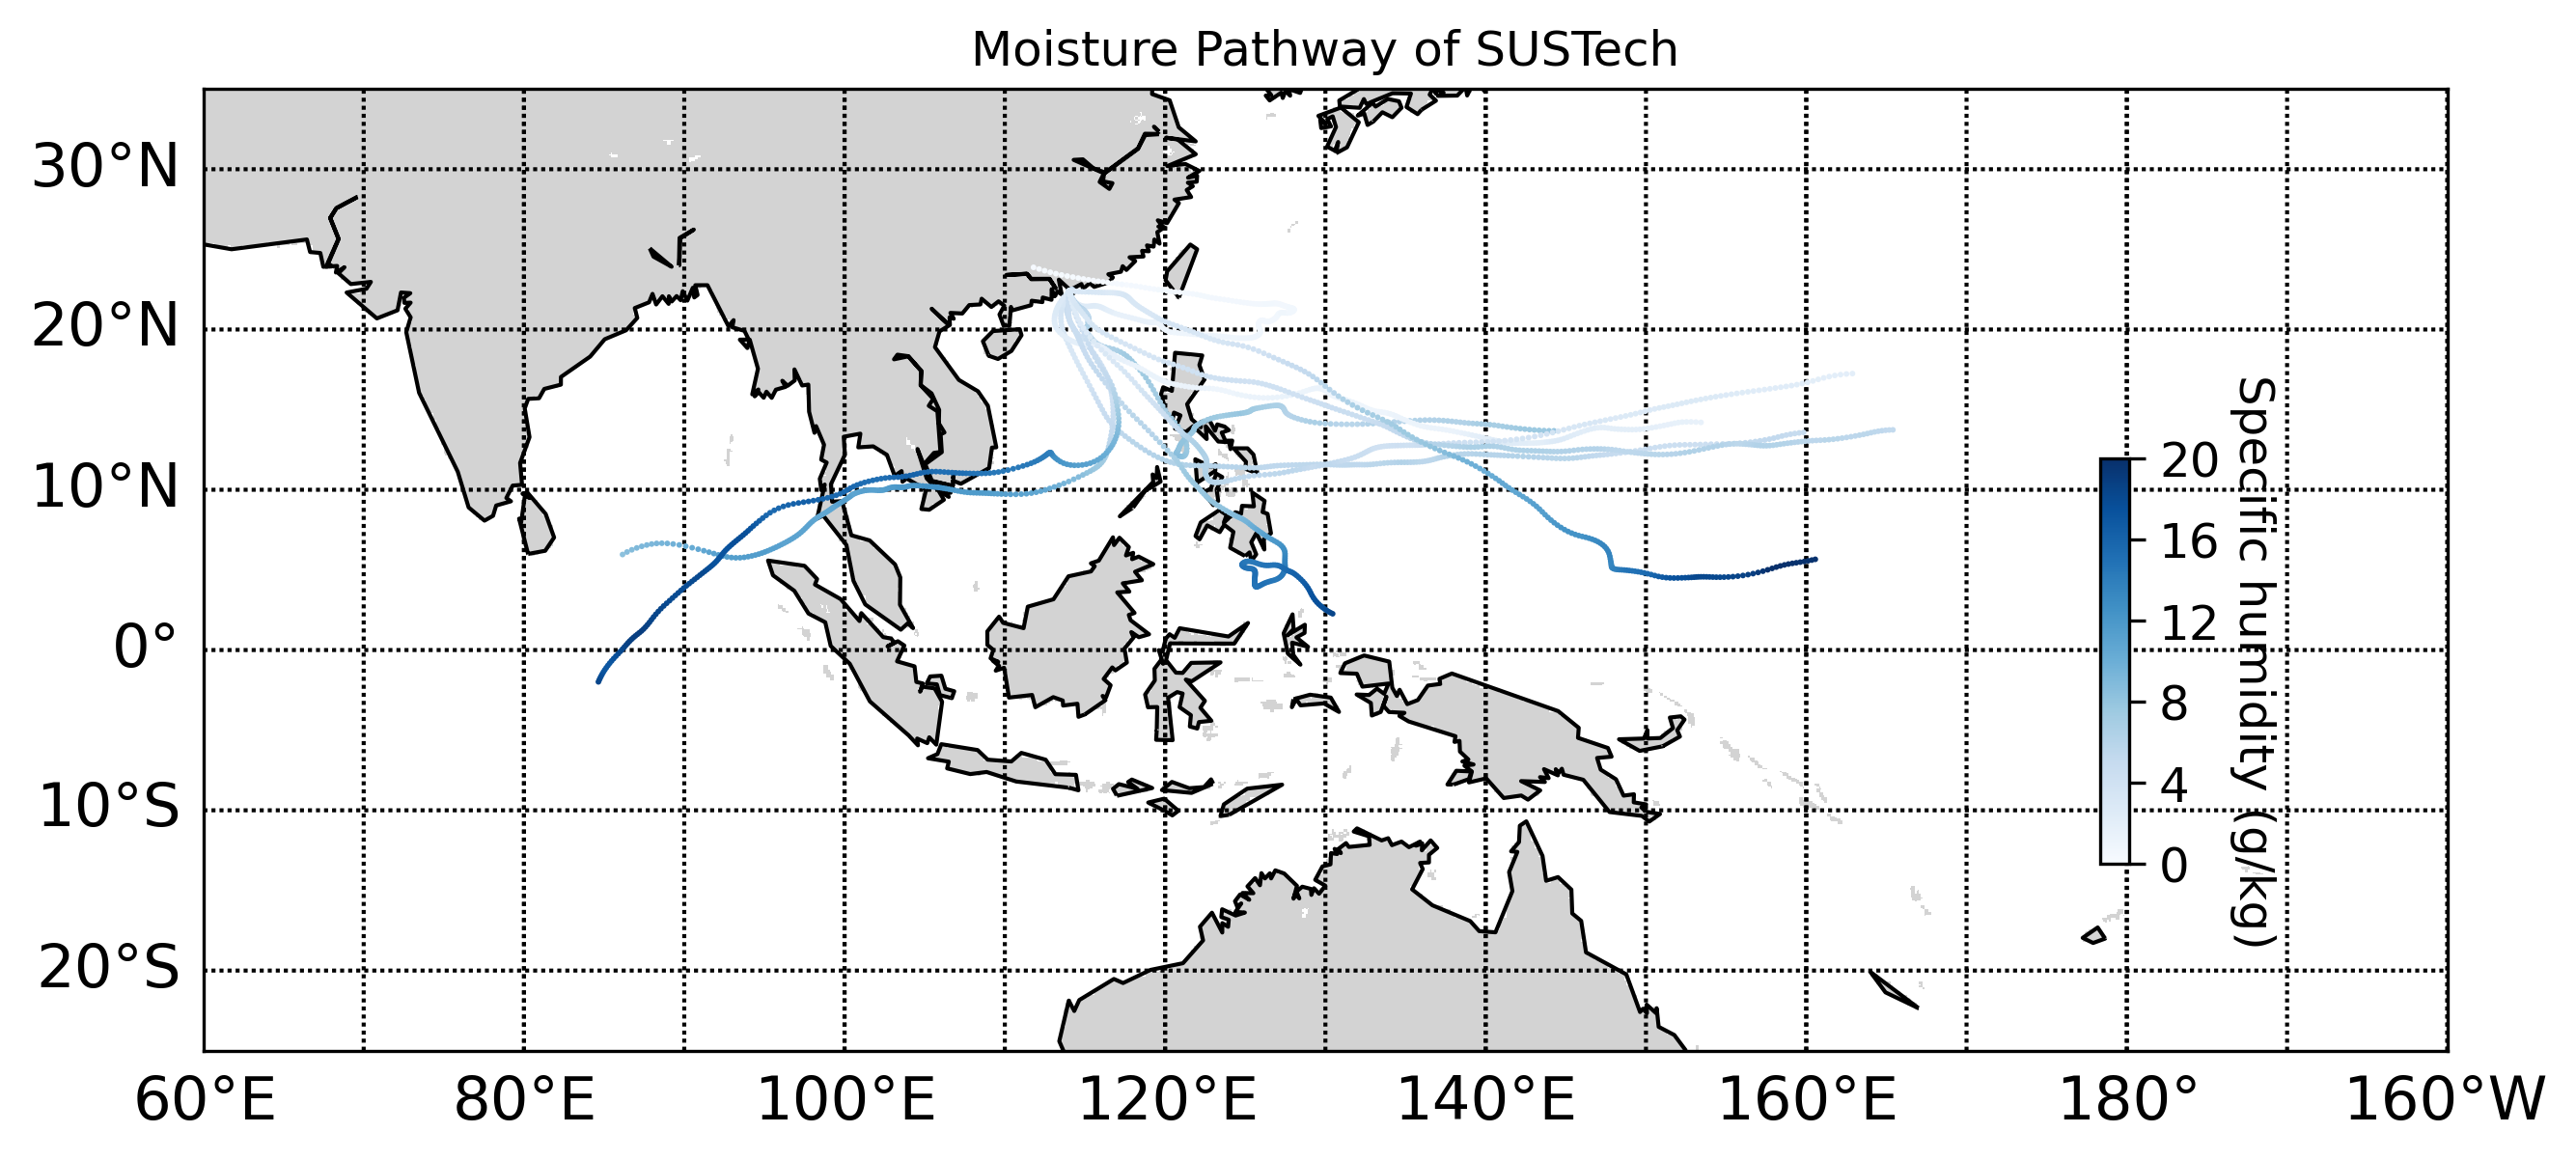

In [18]:
mapcorners = [60, -25, 200, 35]
standard_pm = None
fig, ax = plt.subplots(figsize=(10,7),dpi=300)

bmap_params = pysplit.MapDesign(mapcorners, 
                                standard_pm, 
                                projection = 'cyl',
                                mapcolor = None, 
                                latlon_spacing = (10,10),
                                latlon_labelspacing=(10,20),
                                lon_labels=["bottom"], 
                                latlon_fs=15,
                                drawoutlines=False,resolution="c",
                                )

bmap = bmap_params.make_basemap(ax=ax)
bmap.drawlsmask(land_color = "#d3d3d3", ocean_color="white",)
bmap.drawcoastlines()
plt.title('Moisture Pathway of SUSTech')
for traj in trajgroup[::24]:

    mappable = pysplit.traj_scatter(
        traj.data.Specific_Humidity	.astype(np.float64).values,
        traj.data.geometry.apply(lambda p: p.x).values,
        traj.data.geometry.apply(lambda p: p.y).values,
        bmap, colormap=plt.cm.Blues,size=2,
        vmin=0, vmax=20, suppress_printmsg=False)


cax_position = [0.78, 0.35, 0.01, 0.2]
cax, cbar = pysplit.make_cax_cbar(fig, 
                                  cax_position, 
                                  mappable, 
                                  orientation='vertical',
                                  cbar_label='Specific humidity (g/kg)',)
cbar.ax.tick_params(axis='both', which='both', width=0.8, labelsize=12)
cbar.set_label('Specific humidity (g/kg)', rotation=270, va='center',fontsize = 12, labelpad=8)

plt.show()


#### Different styles of projection

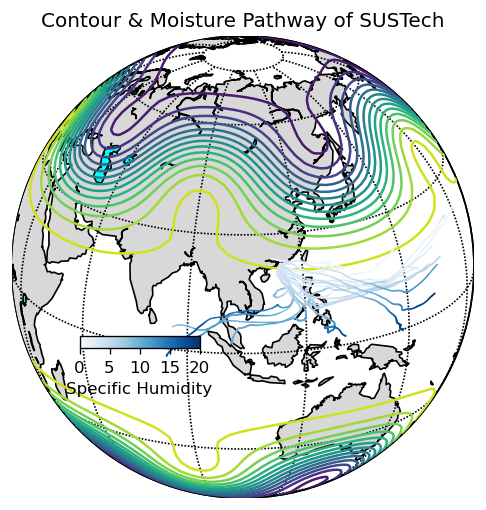

In [19]:
# make some data
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)


# plot
fig, ax = plt.subplots(figsize=(5,5),dpi=120)
map = Basemap(projection='ortho', lat_0=22, lon_0=104, resolution='c',ax=ax)
map.drawcoastlines(linewidth=1)
map.fillcontinents(color='#d8d8d8', lake_color='aqua')
map.drawmapboundary(fill_color='#FFFFFF')
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
x, y = map(lons*180./np.pi, lats*180./np.pi)
cs = map.contour(x,y,wave+mean,15,linewidths=1.5,)

plt.title('Contour & Moisture Pathway of SUSTech')
# Add trajectories to the map
for traj in trajgroup[::12]:
    mappable= pysplit.traj_scatter(
              traj.data.Specific_Humidity.astype(np.float64).values,
              traj.data.geometry.apply(lambda p: p.x).values,
              traj.data.geometry.apply(lambda p: p.y).values,
              map, colormap=plt.cm.Blues, size=1,
              vmin=0, vmax=20, suppress_printmsg=False)
    
    
# add colorbar
cax = fig.add_axes([0.24, 0.36, 0.2, 0.02])
cbar = plt.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.set_label('Specific Humidity')
cbar.set_ticks([0, 5, 10, 15, 20])


if __name__ == "__main__":
    plt.show()

In [20]:
trajgroup.make_infile(r'/Users/gong/hysplit/cluster/working')

In [21]:
traj_assignment = r'/Users/gong/hysplit/cluster/working/CLUSLIST_5'
clusterpath_dir = r'/Users/gong/hysplit/cluster/working'
clusgroup = pysplit.spawn_clusters(trajgroup, traj_assignment, clusterpath_dir)

#### The latitude and longitude information of cluster1 after clustering.

In [22]:
clusgroup[1].path.xy

(array('d', [114.0, 113.927, 113.864, 113.812, 113.771, 113.74, 113.72, 113.71, 113.711, 113.723, 113.745, 113.778, 113.822, 113.876, 113.94, 114.011, 114.09, 114.174, 114.261, 114.352, 114.446, 114.543, 114.644, 114.747, 114.854, 114.964, 115.078, 115.194, 115.312, 115.432, 115.554, 115.676, 115.799, 115.923, 116.048, 116.173, 116.301, 116.431, 116.562, 116.695, 116.829, 116.962, 117.097, 117.231, 117.366, 117.502, 117.638, 117.775, 117.911, 118.045, 118.177, 118.304, 118.426, 118.543, 118.654, 118.759, 118.857, 118.948, 119.034, 119.113, 119.187, 119.256, 119.319, 119.379, 119.434, 119.485, 119.533, 119.579, 119.622, 119.663, 119.702, 119.742, 119.78, 119.819, 119.859, 119.9, 119.943, 119.987, 120.034, 120.081, 120.128, 120.176, 120.224, 120.273, 120.323, 120.374, 120.426, 120.48, 120.535, 120.59, 120.645, 120.701, 120.756, 120.812, 120.867, 120.922, 120.976, 121.029, 121.079, 121.127, 121.171, 121.212, 121.249, 121.284, 121.316, 121.348, 121.379, 121.41, 121.44, 121.469, 121.499, 12

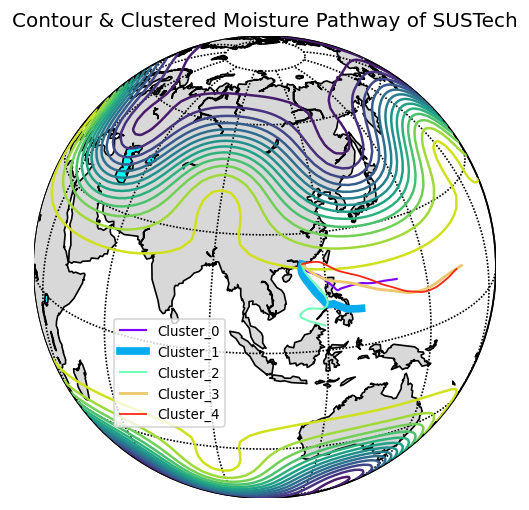

In [23]:
colors = np.linspace(0, 0.95, 5)
# make some data
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
x, y = map(lons*180./np.pi, lats*180./np.pi)

# plot
fig, ax = plt.subplots(figsize=(5,5),dpi=120)
map = Basemap(projection='ortho', lat_0=22, lon_0=104, resolution='c',ax=ax)
map.drawcoastlines(linewidth=1)
map.fillcontinents(color='#d8d8d8', lake_color='aqua')
map.drawmapboundary(fill_color='#FFFFFF')
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
cs = map.contour(x,y,wave+mean,15,linewidths=1.5,)

plt.title('Contour & Clustered Moisture Pathway of SUSTech')


for i, (clus, color) in enumerate(zip(clusgroup, colors)):
    params = {'zorder' : 24,
              'latlon' : True,
              'c' : plt.cm.rainbow(color),
              'label': 'Cluster_'+str(i)}

    map.plot(*clus.path.xy, lw=(clus.trajcount/clusgroup.trajcount)*10, **params)

plt.legend(bbox_to_anchor=(0.16, 0.14), loc=3, prop={'size': 8})
if __name__ == "__main__":
    plt.show()

In [16]:
from pyPSCF import pyPSCF